# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step1. 下載資料

In [2]:
breast_cancer=datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
target = pd.DataFrame(breast_cancer.target, columns= ['target'])
train = pd.concat([data,target], axis=1)
train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:>

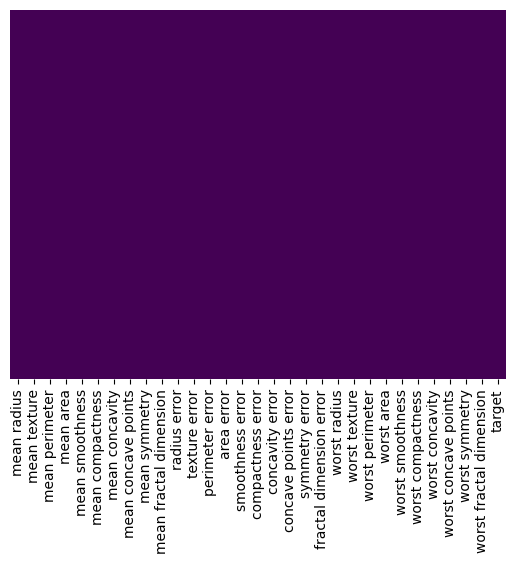

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #無缺值

In [4]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Step1.1. 以決策樹作為初步特徵的篩選

Index(['mean radius', 'worst concavity', 'worst compactness', 'worst area',
       'worst radius', 'fractal dimension error', 'symmetry error',
       'concave points error', 'concavity error', 'compactness error',
       'worst symmetry', 'perimeter error', 'smoothness error',
       'worst fractal dimension', 'radius error', 'mean fractal dimension',
       'mean symmetry', 'mean concave points', 'mean concavity',
       'mean compactness', 'mean smoothness', 'texture error', 'mean texture',
       'mean area', 'mean perimeter', 'area error', 'worst texture',
       'worst smoothness', 'worst concave points', 'worst perimeter'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

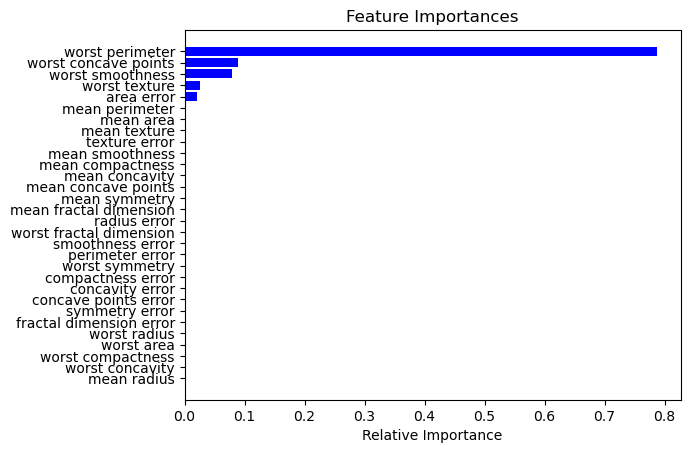

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0)
clf.fit(data,target)
importances = clf.feature_importances_
indices = np.argsort(importances)
features =data.keys()
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Step1.2.  以最重要的兩項特徵'worst perimeter', 'worst smoothness'進行SVC建模

In [6]:
#train_data2 = data[['worst perimeter', 'worst concave points','target']]
train2 = train[['worst perimeter', 'worst smoothness','target']]
train2

,worst perimeter,worst smoothness,target
0,184.60,0.16220,0
1,158.80,0.12380,0
2,152.50,0.14440,0
3,98.87,0.20980,0
4,152.20,0.13740,0
...,...,...,...
564,166.10,0.14100,0
565,155.00,0.11660,0
566,126.70,0.11390,0
567,184.60,0.16500,0


<AxesSubplot:xlabel='worst perimeter', ylabel='worst smoothness'>

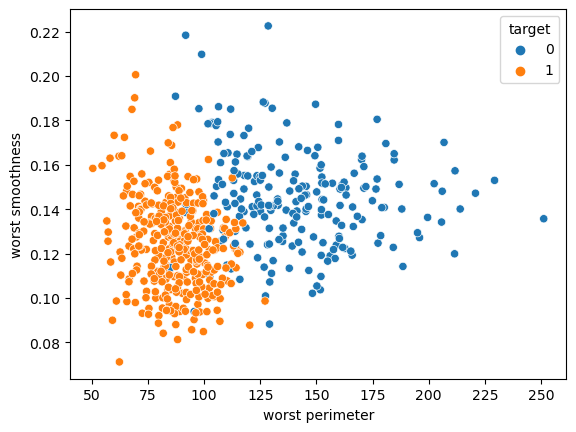

In [7]:
sns.scatterplot(x='worst perimeter',y='worst smoothness', hue ='target', data=train2)

## Step2. 區分訓練集與測試集

In [8]:
X = train2.drop('target', axis=1)
y = train2['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Step3. 建模

In [9]:
clf=svm.SVC(kernel='poly', C=10, gamma=1) 
clf.fit(X_train,y_train)

SVC(C=10, gamma=1, kernel='poly')

## Step4. 預測

```

```


In [10]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

## Step5. 準確度分析

In [11]:
error_index2=np.where(pred_train!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(pred_test!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))


train accuracy: 0.9522613065326633
test accuracy: 0.9298245614035088


In [12]:
print('error_index:',error_index)
print('miss classification :',pred_test[error_index])#錯誤答案
data_index=train.iloc[error_index].index#這裡變數train是所有資料
train.iloc[data_index]#錯誤欄位的正確之原始資料

error_index: [  0   4  38  72  76  77 103 131 137 144 152 153]
miss classification : [0 1 1 1 1 1 0 0 0 0 0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
38,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0
72,17.200,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,0.1927,0.06487,...,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390,0
76,13.530,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.065560,0.2403,0.06641,...,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191,1
77,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.108000,0.2152,0.06673,...,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.030290,0.1945,0.06322,...,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490,1
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.080870,0.1931,0.05796,...,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019,0
137,11.430,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.028750,0.1734,0.05865,...,22.02,79.93,462.0,0.11900,0.16480,0.13990,0.08476,0.2676,0.06765,1
144,10.750,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769,1


In [15]:
def SVM_plot(clf,title):
    training_x_min=X['worst perimeter'].values.min()-10
    training_x_max=X['worst perimeter'].values.max()+10
    training_y_min=X['worst smoothness'].values.min()-0.02
    training_y_max=X['worst smoothness'].values.max()+0.02
    grid_interval=0.001
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    target0 = train[train['target'].isin([0])]
    target1 = train[train['target'].isin([1])]
    plt.scatter(target0['worst perimeter'],target0['worst smoothness'],color='red')
    plt.scatter(target1['worst perimeter'],target1['worst smoothness'],color='blue')
    plt.title(title)
    plt.show()

c:\Users\mtshi\anaconda3\envs\tibame\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


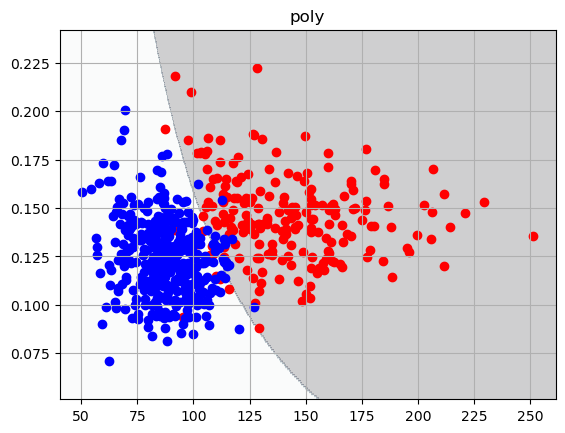

In [16]:
SVM_plot(clf,'poly')

In [ ]:
C = [10,100] #調參，看各參數設定下的表現
gamma = [1,2]

for i in range(len(C)):
    for j in range(len(gamma)):
        #print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='poly',C=C[i], gamma=gamma[j])
        clf.fit(X_train,y_train)
        SVM_plot(clf,'rbf-C={0},gamma={1}'.format(C[i],gamma[j]))